In [175]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder , LabelEncoder


In [176]:

dataset = pd.read_csv('E:\VSCode-Python\Tuwaiq\Bootcamp-Project-5\Project5\ds_salaries.csv')
dataset.head()

dataset = dataset[['work_year','experience_level','employment_type','job_title','salary',
                   'employee_residence','remote_ratio','company_location','company_size']]
dataset

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [177]:

import country_converter
cc = country_converter.CountryConverter()
dataset['company_location'] = cc.convert(dataset['company_location'], to='name_short')
dataset['employee_residence'] = cc.convert(dataset['employee_residence'], to='name_short')

dataset['experience_level'] = dataset['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})
dataset['employment_type'] = dataset['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})
dataset

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,70000,Germany,0,Germany,L
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,0,Japan,S
2,2020,Senior,Full-time,Big Data Engineer,85000,United Kingdom,50,United Kingdom,M
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,0,Honduras,S
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,50,United States,L
...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,United States,100,United States,M
603,2022,Senior,Full-time,Data Engineer,126000,United States,100,United States,M
604,2022,Senior,Full-time,Data Analyst,129000,United States,0,United States,M
605,2022,Senior,Full-time,Data Analyst,150000,United States,100,United States,M


In [178]:

dataset["salary_range"] = dataset["salary"]
salaries = []
for salary in dataset["salary_range"]:
    if salary <= 150000:
        salaries.append(0)
    else:
        salaries.append(1)

dataset["salary_range"] = salaries
dataset

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,Mid,Full-time,Data Scientist,70000,Germany,0,Germany,L,0
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,0,Japan,S,1
2,2020,Senior,Full-time,Big Data Engineer,85000,United Kingdom,50,United Kingdom,M,0
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,0,Honduras,S,0
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,50,United States,L,0
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,United States,100,United States,M,1
603,2022,Senior,Full-time,Data Engineer,126000,United States,100,United States,M,0
604,2022,Senior,Full-time,Data Analyst,129000,United States,0,United States,M,0
605,2022,Senior,Full-time,Data Analyst,150000,United States,100,United States,M,0


In [179]:
le = LabelEncoder()
dataset =  (dataset.loc[:,dataset.columns!='salary'])

dataset.head(3)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,Mid,Full-time,Data Scientist,Germany,0,Germany,L,0
1,2020,Senior,Full-time,Machine Learning Scientist,Japan,0,Japan,S,1
2,2020,Senior,Full-time,Big Data Engineer,United Kingdom,50,United Kingdom,M,0


In [180]:

import matplotlib.pyplot as plt

In [181]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [182]:
encoders={}
for col in dataset.columns:
    if dataset[col].dtypes == 'O':
        encoder=LabelEncoder()
        encoder.fit(dataset[col])
        encoders[col]=encoder
        dataset[col]=encoder.transform(dataset[col])
encoders

C:\Users\moaat\AppData\Local\Temp\ipykernel_19936\3870878456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col]=encoder.transform(dataset[col])
C:\Users\moaat\AppData\Local\Temp\ipykernel_19936\3870878456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col]=encoder.transform(dataset[col])
C:\Users\moaat\AppData\Local\Temp\ipykernel_19936\3870878456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

{'experience_level': LabelEncoder(),
 'employment_type': LabelEncoder(),
 'job_title': LabelEncoder(),
 'employee_residence': LabelEncoder(),
 'company_location': LabelEncoder(),
 'company_size': LabelEncoder()}

In [183]:
for key,values in encoders.items():
    print(key,' ',values.classes_)

experience_level   ['Entry' 'Executive' 'Mid' 'Senior']
employment_type   ['Contract' 'Freelance' 'Full-time' 'Part-time']
job_title   ['3D Computer Vision Researcher' 'AI Scientist' 'Analytics Engineer'
 'Applied Data Scientist' 'Applied Machine Learning Scientist'
 'BI Data Analyst' 'Big Data Architect' 'Big Data Engineer'
 'Business Data Analyst' 'Cloud Data Engineer' 'Computer Vision Engineer'
 'Computer Vision Software Engineer' 'Data Analyst'
 'Data Analytics Engineer' 'Data Analytics Lead' 'Data Analytics Manager'
 'Data Architect' 'Data Engineer' 'Data Engineering Manager'
 'Data Science Consultant' 'Data Science Engineer' 'Data Science Manager'
 'Data Scientist' 'Data Specialist' 'Director of Data Engineering'
 'Director of Data Science' 'ETL Developer' 'Finance Data Analyst'
 'Financial Data Analyst' 'Head of Data' 'Head of Data Science'
 'Head of Machine Learning' 'Lead Data Analyst' 'Lead Data Engineer'
 'Lead Data Scientist' 'Lead Machine Learning Engineer' 'ML Engineer'
 

In [184]:
dataset

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,2,2,22,17,0,15,0,0
1,2020,3,2,41,27,0,25,2,1
2,2020,3,2,7,54,50,47,1,0
3,2020,2,2,47,19,0,17,2,0
4,2020,3,2,38,55,50,48,0,0
...,...,...,...,...,...,...,...,...,...
602,2022,3,2,17,55,100,48,1,1
603,2022,3,2,17,55,100,48,1,0
604,2022,3,2,12,55,0,48,1,0
605,2022,3,2,12,55,100,48,1,0


In [185]:

X = dataset.drop(['salary_range'],axis=1)
y = dataset['salary_range']

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=23)

logis_model = LogisticRegression()
logis_model.fit(X,y)


c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

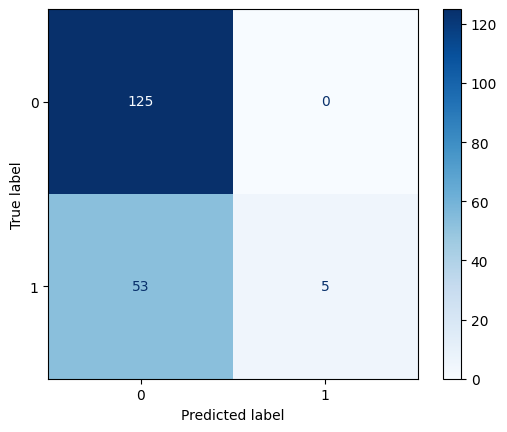

In [186]:
predictions = logis_model.predict(x_test)
actual_values = np.array(y_test)

# create confusion matrix
con_matrix2 = confusion_matrix(actual_values,predictions)
con_display2 = ConfusionMatrixDisplay(confusion_matrix=con_matrix2)
con_display2.plot(cmap='Blues')
plt.show()

In [187]:
with open('model.pkl', 'wb') as file:

    pickle.dump(logis_model, file)

In [188]:
for key,value in encoders.items():
    with open(str(key)+'.pkl', 'wb') as file:
        pickle.dump(value, file)

In [189]:
for key,val in encoders.items():
    print(key)

experience_level
employment_type
job_title
employee_residence
company_location
company_size
